In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey_results_public.csv")

In [2]:
df.shape

(73268, 79)

In [3]:
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

In [5]:
df = df[["Country", "EdLevel","YearsCodePro", "Employment", "ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,Canada,NaN,NaN,"Employed, full-time",NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
4,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,"Employed, full-time",NaN


In [6]:
df.isnull().sum()

Country          1497
EdLevel          1697
YearsCodePro    21435
Employment       1559
Salary          35197
dtype: int64

In [7]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",49056.0
10,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Employed, full-time",60307.0
11,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,"Employed, full-time;Independent contractor, fr...",194400.0


In [8]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [9]:
df.shape

(37919, 5)

In [10]:
df["Employment"].unique()

array(['Employed, full-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Independent contractor, freelancer, or self-employed',
       'Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Employed, part-time', 'I prefer not to say',
       'Independent contractor, freelancer, or self-employed;Retired',
       'Retired', 'Employed, part-time;Retired',
       'Employed, full-time;Retired',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Retired'],
      dtype=object)

In [11]:
filtered_df = df[df["Employment"] == "Employed, full-time"]
filtered_df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",49056.0
10,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Employed, full-time",60307.0
12,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Employed, full-time",65000.0


In [12]:
filtered_df.shape

(31382, 5)

In [13]:
# keep only the data with Employed fill-time
df = df[df["Employment"] == "Employed, full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31382 entries, 2 to 73121
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       31382 non-null  object 
 1   EdLevel       31382 non-null  object 
 2   YearsCodePro  31382 non-null  object 
 3   Salary        31382 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [14]:
df.head()

,Country,EdLevel,YearsCodePro,Salary
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,215232.0
8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,49056.0
10,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,60307.0
12,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,65000.0


In [15]:
df["Country"].value_counts()

Country
United States of America                                7858
Germany                                                 2382
United Kingdom of Great Britain and Northern Ireland    2341
India                                                   1869
Canada                                                  1249
                                                        ... 
Haiti                                                      1
Zambia                                                     1
Suriname                                                   1
Somalia                                                    1
Seychelles                                                 1
Name: count, Length: 155, dtype: int64

In [16]:
# get rid of the small number of countries
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = "Others" # combine the small number of countries into Others
    return categorical_map

In [17]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df["Country"] = df["Country"].map(country_map)
df.Country.value_counts()

Country
Others                                                  8643
United States of America                                7858
Germany                                                 2382
United Kingdom of Great Britain and Northern Ireland    2341
India                                                   1869
Canada                                                  1249
France                                                  1126
Brazil                                                  1014
Spain                                                    858
Netherlands                                              701
Australia                                                700
Italy                                                    667
Poland                                                   572
Sweden                                                   561
Russian Federation                                       425
Switzerland                                              416
Name: count, dty

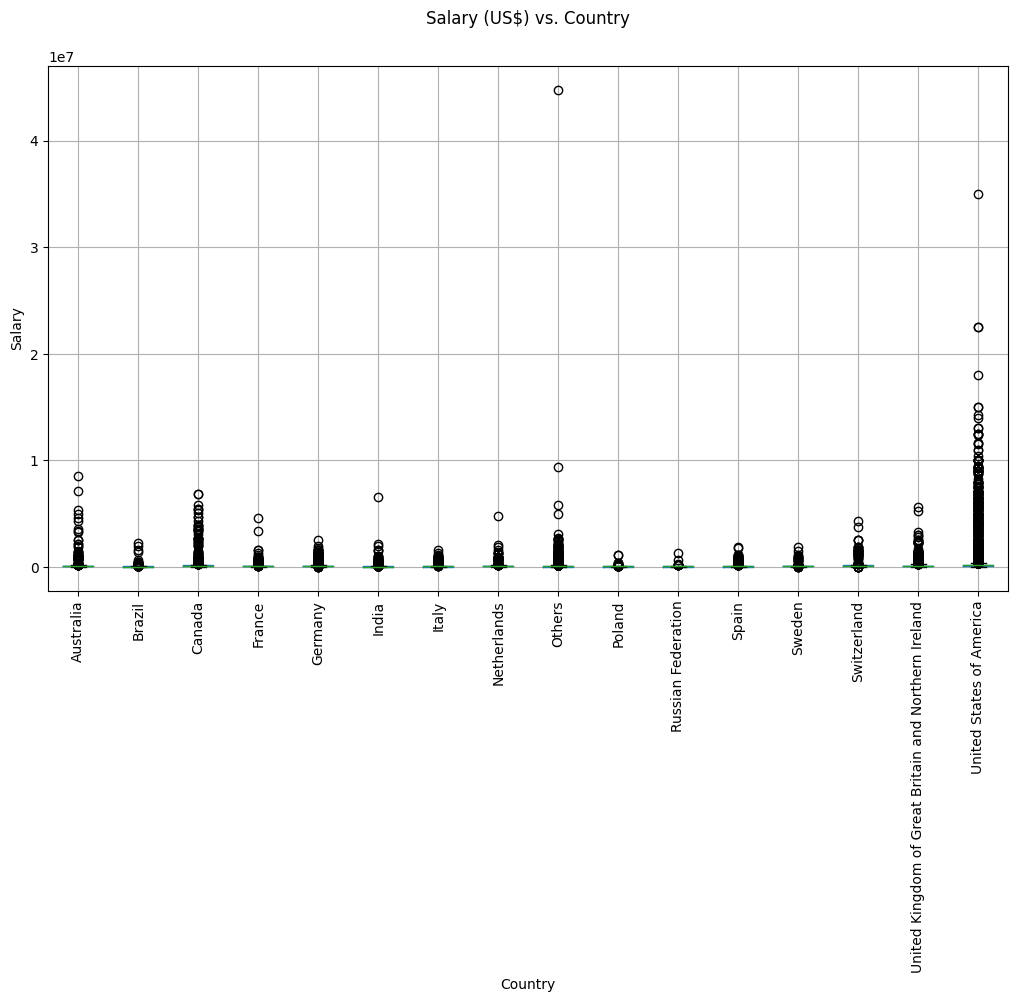

In [18]:
# inspect the salary range
fig, ax = plt.subplots(1,1, figsize = (12,7))
df.boxplot("Salary", "Country", ax=ax)
plt.suptitle("Salary (US$) vs. Country")
plt.title(" ")
plt.ylabel("Salary")
plt.xticks(rotation=90)
plt.show()

In [19]:
df = df[df["Salary"] <= 300000]
df = df[df["Salary"] >= 10000]
df = df[df["Country"] != "Others"]

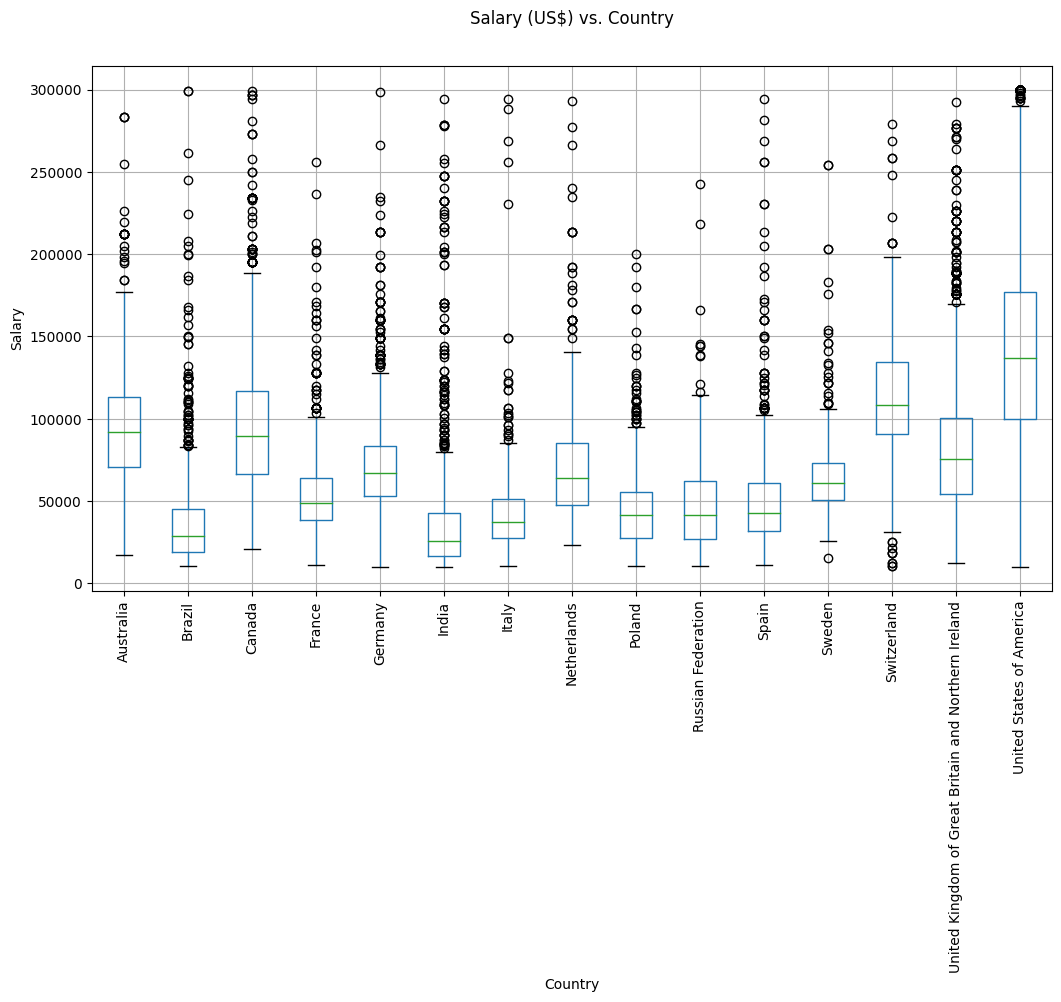

In [20]:
fig, ax = plt.subplots(1,1, figsize = (12,7))
df.boxplot("Salary", "Country", ax=ax)
plt.suptitle("Salary (US$) vs. Country")
plt.title(" ")
plt.ylabel("Salary")
plt.xticks(rotation=90)
plt.show()

In [21]:
df["YearsCodePro"].unique()

array(['5', '6', '2', '4', '20', '9', '14', '21', '15', '25', '3', '10',
       '8', '12', '7', '19', '17', '24', '1', '11', '23',
       'Less than 1 year', '18', '37', '46', '22', '32', '13', '27', '28',
       '16', '31', '34', '35', '26', '42', '38', '30', '36', '40', '41',
       '29', '33', '39', '48', '45', '44', '43', 'More than 50 years',
       '47', '49', '50'], dtype=object)

In [22]:
def clean_experience(x):
    if x == "More than 50 years":
        return 50
    if x == "Less than 1 year":
        return 0.5
    return float(x)

df["YearsCodePro"] = df["YearsCodePro"].apply(clean_experience)

In [23]:
df["YearsCodePro"].unique()

array([ 5. ,  6. ,  2. ,  4. , 20. ,  9. , 14. , 21. , 15. , 25. ,  3. ,
       10. ,  8. , 12. ,  7. , 19. , 17. , 24. ,  1. , 11. , 23. ,  0.5,
       18. , 37. , 46. , 22. , 32. , 13. , 27. , 28. , 16. , 31. , 34. ,
       35. , 26. , 42. , 38. , 30. , 36. , 40. , 41. , 29. , 33. , 39. ,
       48. , 45. , 44. , 43. , 50. , 47. , 49. ])

In [24]:
df["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Something else',
       'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school'], dtype=object)

In [25]:
def clean_education(x):
    if "Bachelor’s degree (B.A., B.S., B.Eng., etc.)" in x:
        return "Bachelor's degree"
    if "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)" in x:
        return "Master's degree"
    if "Professional degree (JD, MD, etc.)" in x or "Other doctoral degree (Ph.D., Ed.D., etc.)" in x:
        return "Post grad"
    return "Less than a Bachelors"

df["EdLevel"] = df["EdLevel"].apply(clean_education)

In [26]:
df["EdLevel"].unique()

array(["Master's degree", "Bachelor's degree", 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [27]:
df.head()

,Country,EdLevel,YearsCodePro,Salary
2,United Kingdom of Great Britain and Northern I...,Master's degree,5.0,40205.0
8,Netherlands,Master's degree,6.0,49056.0
10,United Kingdom of Great Britain and Northern I...,Bachelor's degree,2.0,60307.0
12,United States of America,Bachelor's degree,5.0,65000.0
21,Italy,Master's degree,4.0,34126.0


In [28]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df["EdLevel"] = le_education.fit_transform(df["EdLevel"])
df["EdLevel"].unique()

array([2, 0, 1, 3])

In [29]:
le_country = LabelEncoder()
df["Country"] = le_country.fit_transform(df["Country"])
df["Country"].unique()

array([13,  7, 14,  6,  2,  4,  8,  3,  1, 11, 10,  5, 12,  0,  9])

In [30]:
df.head()

,Country,EdLevel,YearsCodePro,Salary
2,13,2,5.0,40205.0
8,7,2,6.0,49056.0
10,13,0,2.0,60307.0
12,14,0,5.0,65000.0
21,6,2,4.0,34126.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20244 entries, 2 to 73121
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       20244 non-null  int64  
 1   EdLevel       20244 non-null  int64  
 2   YearsCodePro  20244 non-null  float64
 3   Salary        20244 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 790.8 KB


In [32]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [34]:
y_pred = linear_reg.predict(X)

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

error_lin = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error_lin))

$49,370.57


Decision Tree

In [36]:
from sklearn.tree import DecisionTreeRegressor

dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [37]:
y_pred_tree = dec_tree_reg.predict(X)

error_tree = np.sqrt(mean_squared_error(y, y_pred_tree))
print("${:,.02f}".format(error_tree))

$38,375.22


Random Forest

In [38]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [39]:
y_pred_rf = random_forest_reg.predict(X)

error_rf = np.square(mean_squared_error(y, y_pred_rf))
print("${:,.02f}".format(error_rf))

$2,186,554,888,291,937,792.00


In [40]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring = 'neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [41]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred_gs = regressor.predict(X)
error_gs = np.sqrt(mean_squared_error(y, y_pred_gs))
print("${:,.02f}".format(error_gs))

$39,713.99


#### Assign new data

In [42]:
X

,Country,EdLevel,YearsCodePro
2,13,2,5.0
8,7,2,6.0
10,13,0,2.0
12,14,0,5.0
21,6,2,4.0
...,...,...,...
73113,14,2,5.0
73116,14,0,16.0
73119,14,0,1.0
73120,10,0,2.0


In [43]:
# country, edlevel, yearscodepro
# assign new data

X = np.array([["Germany", "Master's degree", 15]])
X

array([['Germany', "Master's degree", '15']], dtype='<U21')

In [44]:
X[:, 0] = le_country.transform(X[:, 0])
X[:, 1] = le_education.transform(X[:, 1])
X = X.astype(float)
X

array([[ 4.,  2., 15.]])

In [45]:
y_pred = dec_tree_reg.predict(X)
y_pred

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([89563.94444444])

#### Save the model using Pickle

In [46]:
import pickle

In [47]:
data = {"model": dec_tree_reg, "le_country": le_country, "le_education": le_education}
with open("save_step.pkl", "wb") as file: # open in write binary mode (wb)
    pickle.dump(data, file)

In [48]:
# check by reloading
with open("save_step.pkl", "rb") as file:
    data = pickle.load(file)

dec_tree_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [49]:
y_pred = dec_tree_loaded.predict(X)
y_pred

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([89563.94444444])